In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans

# Exploring and cleaning

In [14]:
movie = data = pd.read_csv('tmdb_5000_movies.csv')
data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [94]:
str_list = [] # List of string typed columns

for colname, colvalue in data.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
            
# Get to the numeric columns by inversion            
num_list = list(data.columns.difference(str_list))
# Get rid of the "id" column
num_list.pop(num_list.index('id'))

'id'

In [95]:
movie_num = data[num_list]
movie_num.head()

,budget,popularity,revenue,runtime,vote_average,vote_count
0,237000000,150.437577,2787965087,162.0,7.2,11800
1,300000000,139.082615,961000000,169.0,6.9,4500
2,245000000,107.376788,880674609,148.0,6.3,4466
3,250000000,112.312950,1084939099,165.0,7.6,9106
4,260000000,43.926995,284139100,132.0,6.1,2124


In [96]:
# Fill na values with 0 (or drop them)
movie_num = movie_num.fillna(value=0, axis=1)

# PCA

In [106]:
# Data Normalization
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(movie_num.values)

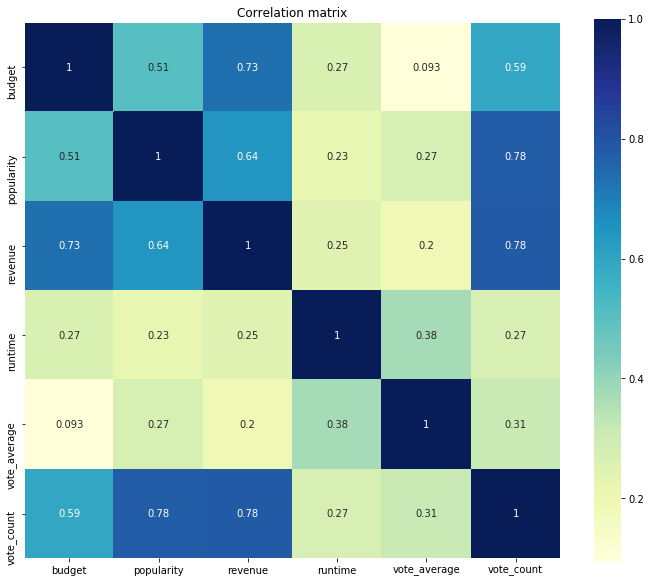

In [107]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Correlation matrix')
# Draw the heatmap using seaborn
sns.heatmap(movie_num.astype(float).corr(), square=True, cmap="YlGnBu", linecolor='black', annot=True)



### Correlation matrix observation
The revenue and the vote_count (popularity) are highly correlated but the vote_average (score) and the revenue aren't.
Conclusion : Doesn't matter if people like the film or not so it has a good revenue, it just have to be popular (marketting will do :) )

This insight is confirmed by the correlation between budget and revenue : 0.73.
Conclusion: the more money you put on the movie, the more it will make revenue.

# Eigen Vectors

In [108]:
# eigen vector, eigen values
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [109]:
# Calculation of Explained Variance from the eigen values
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

In [110]:
var_exp

[46.79589959200138,
 19.246096540257067,
 11.967362811496502,
 10.138278599809635,
 5.8893047400970335,
 3.681200758939541,
 2.2818569573988574]

In [111]:
list(cum_var_exp)

[46.79589959200138,
 66.04199613225845,
 78.00935894375495,
 88.14763754356458,
 94.03694228366162,
 97.71814304260116,
 100.00000000000001]

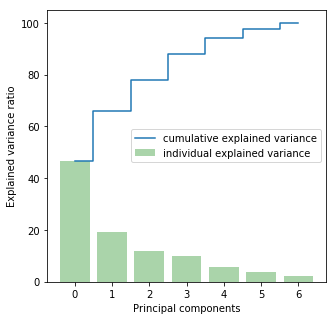

In [112]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERPOSED 
plt.figure(figsize=(5, 5))
plt.bar(range(7), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(7), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [113]:
# apply PCA to the normalized data
pca = PCA(n_components=5)
x_9d = pca.fit_transform(X_std)

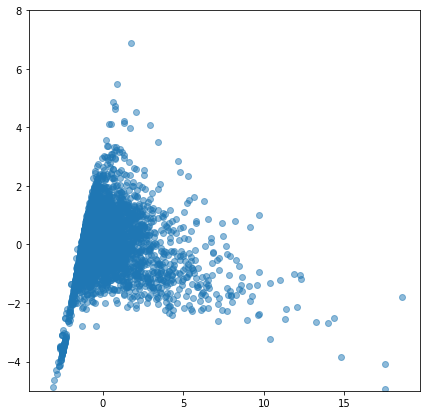

In [114]:
# Plot scatter plot between the first and the second dimension
plt.figure(figsize = (7,7))
plt.scatter(x_9d[:,0],x_9d[:,1],alpha=0.5)
plt.ylim(-5,8)
plt.show()

### Scatter observation

The plot obtained by scatter is essential to see if clear clusters appear or not. In this case, the plot isn't really encouraging. 
So we're going to try a 3 cluster or a 4 cluster kmeans algorithm

#### 2 Kmean cluster 

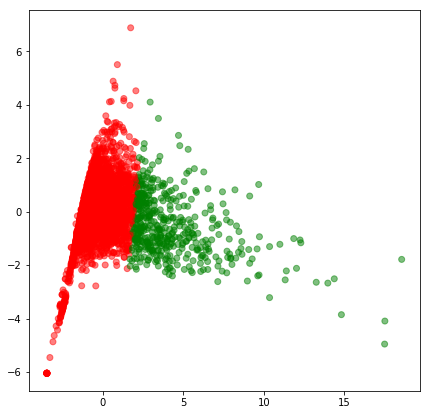

In [116]:
# Set a 2 KMeans clustering
kmeans = KMeans(n_clusters=2)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_9d)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_9d[:,0],x_9d[:,1], c= label_color, alpha=0.5) 
plt.show()

#### 3 Kmean cluster 

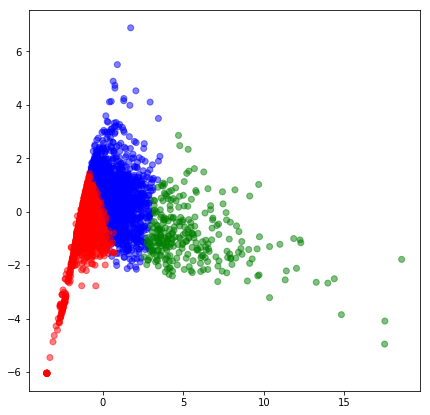

In [119]:
# Set a 3 KMeans clustering
kmeans = KMeans(n_clusters=3)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_9d)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_9d[:,0],x_9d[:,1], c= label_color, alpha=0.5) 
plt.show()

#### 4 Kmean cluster 

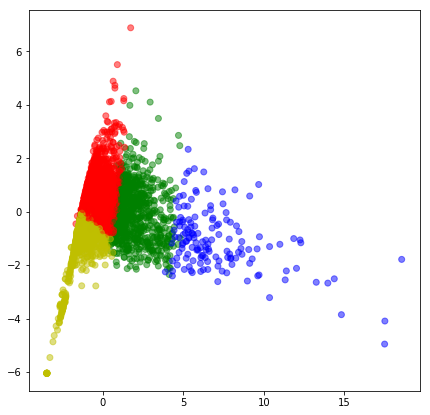

In [118]:
# Set a 4 KMeans clustering
kmeans = KMeans(n_clusters=4)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_9d)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b',3:'y'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_9d[:,0],x_9d[:,1], c= label_color, alpha=0.5) 
plt.show()

# Conclusion

### The 2 Kmean clustering :
    According to the plot figure, we have two resulting clusters : one a lot more dense than the second and the separation between both clusters isn't optimal (the contact zone between them is comparable to the actual size of the clusters). Conclusion : Not satisfying

### The 3 Kmean clustering :
    According to the plot figure, we have three resulting clusters with balanced density but the separation between clusters isn't optimal yet. Conclusion : more or less satisfying.

### The 4 Kmean clustering :
    According to the plot figure, we have four resulting clusters with more or less balanced density and the separation between clusters is better than the last two results. Conclusion : more or less satisfying.
    

So we can choose either the 3 Kmean or the 4 Kmean cluster to classify our dataset!